![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTK4gQ9nhwHHaSXMHpeggWg7twwMCgb877smkRmtkmDeDoGF9Z6&usqp=CAU)

# <font color='PURPLE'>Ciência dos Dados na Prática</font>

# <font color='GREY'> Prevendo Evasão de clientes das Seguradoras </font>


![](https://www.engagebay.com/blog/wp-content/uploads/2019/02/6-Personalization-Customer-Retention-Strategies.gif)

As seguradoras em todo o mundo operam em um ambiente muito **competitivo**

![](https://i.pinimg.com/originals/66/c3/04/66c3045029cd252090676d2c397ec02d.gif)

Com vários aspectos de dados coletados de milhões de clientes, é extremamente difícil analisar e **entender o motivo da decisão** de um cliente de mudar para um provedor de seguros diferente. 

![](https://webengage.com/blog/wp-content/uploads/sites/4/2019/08/Untitled-1.gif)

Para uma indústria em que a aquisição e retenção de clientes são igualmente importantes, e a primeira sendo um processo mais caro, **as seguradoras contam com OS DADOS para entender o comportamento do cliente e aumentar a retenção**. 

![](https://media0.giphy.com/media/sRFEa8lbeC7zbcIZZR/giphy.gif)

Assim, **saber se um cliente possivelmente quer cancelar o seguro** de antemão dá às seguradoras a oportunidade de **criar estratégias para evitar** que isso realmente aconteça. 

![](https://thumbs.gfycat.com/InsignificantFlakyCoati-size_restricted.gif)

#1° Problema de Negócio


Seu objetivo como cientista de dados é construir um modelo de aprendizado de máquina, uma Máquina Preditiva, que possa **prever se a seguradora perderá um cliente ou não**. Você recebe 16 variáveis anônimas (feature_0 a feature 15) que influenciam a rotatividade de clientes no setor de seguros.


In [24]:
# Mapeamento de Pacotes
import pandas as pd
import seaborn as sns
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
#Verificar versões dos pacotes e desabilitar warnings
!pip install -q -U watermark
%reload_ext watermark
%watermark -a "Ciência dos Dados" --iversions

# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste script:', python_version())

#Alertas
import warnings
import sys
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
if not sys.warnoptions:
    warnings.simplefilter("ignore")



Author: Ciência dos Dados

IPython : 5.5.0
pandas  : 1.1.5
seaborn : 0.11.1
lightgbm: 2.2.3

Versão da Linguagem Python Usada Neste script: 3.7.10


#2° Análise Exploratória dos Dados


###Fonte de Dados:
https://www.machinehack.com/hackathons/insurance_churn_prediction_weekend_hackathon_2/leaderboard

![](https://cienciadosdados.com/images/2021/MH.png)

In [3]:
#Importando os Dados
df_train = pd.read_csv('Train.csv')

In [ ]:
#Visualizando as 5 primeiras linhas
df_train.head(5)

In [5]:
#Contagem de Domínios Distintos
df_train.nunique()

feature_0       77
feature_1     6434
feature_2       31
feature_3     1482
feature_4       47
feature_5      517
feature_6       36
feature_7       12
feature_8        3
feature_9        4
feature_10       2
feature_11       2
feature_12       2
feature_13       3
feature_14      12
feature_15       4
labels           2
dtype: int64

In [7]:
#Verifica Valores Nulos
df_train.isna().sum()

feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
labels        0
dtype: int64

In [8]:
#Verifica Registros Duplicados
df_train.duplicated().sum()

0

In [9]:
#Estatística Descritiva dos Campos
df_train.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
count,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000
mean,-0.004158,0.002584,-0.000213,-0.000053,-0.000298,-0.004652,-0.007498,4.336381,1.171051,1.225345,0.018137,0.555503,0.159667,0.639407,5.520497,2.562375,0.116993
std,0.999776,1.014268,1.000872,1.002512,1.003724,0.993984,0.802696,3.273376,0.606730,0.749104,0.133450,0.496917,0.366303,0.897627,3.003241,0.987148,0.321417
min,-2.159994,-3.081149,-1.779108,-1.002478,-0.569351,-0.411453,-0.251940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.747384,-0.422787,-0.938003,-0.602517,-0.569351,-0.411453,-0.251940,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000
50%,-0.182341,-0.297324,0.023260,-0.303517,-0.246560,-0.411453,-0.251940,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000,3.000000,0.000000
75%,0.665225,0.022901,0.624050,0.236237,0.076230,-0.411453,-0.251940,7.000000,2.000000,2.000000,0.000000,1.000000,0.000000,2.000000,8.000000,3.000000,0.000000
max,5.091402,33.094776,1.825628,18.094700,19.443647,8.127648,23.625644,11.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,11.000000,3.000000,1.000000


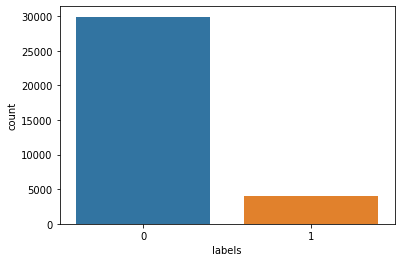

In [10]:
#Estatística da Label (target.....Y.....Variável dependente.....caraca é nome demais p mesma coisa)
df_train['labels'].value_counts(normalize=True)
sns.countplot(df_train['labels'])

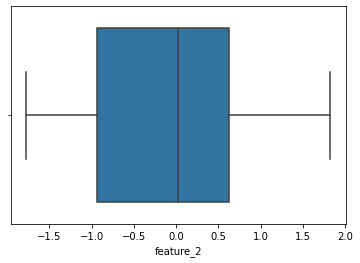

In [11]:
#Estatística dos Campos
df_train['feature_2'].value_counts()
sns.boxplot(df_train['feature_2'])

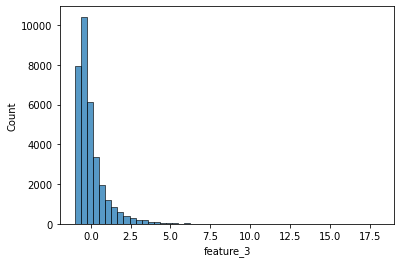

In [12]:
#Estatística dos Campos
df_train['feature_3'].value_counts()
sns.histplot(df_train['feature_3'], bins=50)

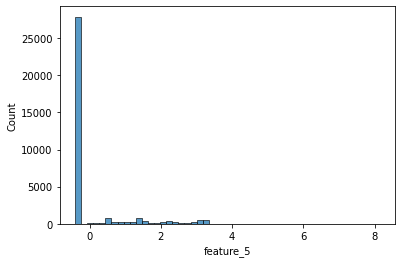

In [13]:
#Estatística dos Campos
df_train['feature_5'].value_counts()
sns.histplot(df_train['feature_5'], bins=50)

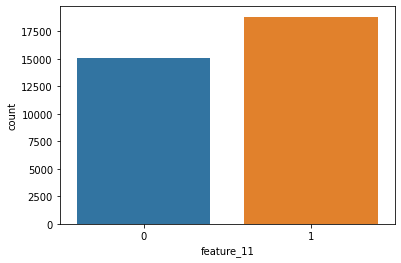

In [14]:
#Estatística dos Campos
df_train['feature_11'].value_counts()
sns.countplot(df_train['feature_11'])

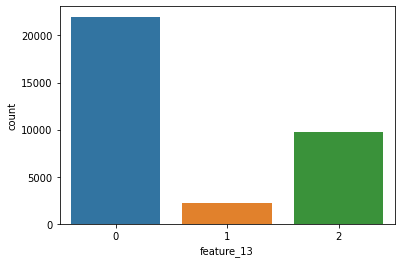

In [15]:
#Estatística dos Campos
df_train['feature_13'].value_counts()
sns.countplot(df_train['feature_13'])

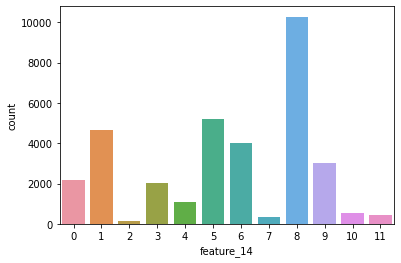

In [16]:
#Estatística dos Campos
df_train['feature_14'].value_counts()
sns.countplot(df_train['feature_14'])

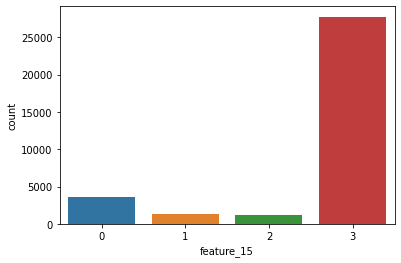

In [17]:
#Estatística dos Campos
df_train['feature_15'].value_counts()
sns.countplot(df_train['feature_15'])

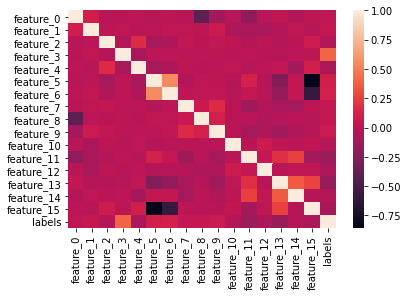

In [18]:
#Mapa de Correlação das Variáveis(features)
corr = df_train.corr()
sns.heatmap(corr)

#3° Pré-Processamento dos Dados

### **Balanceamento** **da** **Classe**
O conjunto de dados está altamente desbalanceado e precisa de tratamento. Vamos usar uma **Hiperparâmetro** do Algoritmo ao invés de usar funções específicas como o SMOTE.

### **Seleção das Variáveis - Feature Select**

In [19]:
#Separando os valores para realizar o Treinamento 
array = df_train.values

In [26]:
# Separando o array em componentes de input e output (variáveis explicativas e Target(Y))
X = array[:, [2,3,5,11,13,14,15]]
Y = array[:,16]

In [27]:
# Definindo o tamanho dos dados de treino e de teste
teste_size = 0.38
seed = 7



In [28]:
# Criando o dataset de treino e de teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)


#4° Construíndo a Máquina Preditiva 


In [29]:
# Criando a Máquina Preditiva
modelo = lgb.LGBMClassifier(
                            n_estimators=95,
                            learning_rate=0.1,
                            scale_pos_weight=3, 
                            random_state=7,
                           )



### **Explicando os Hiperparâmetros**


"**scale_pos_weight**":  
Controle o saldo de pesos positivos e negativos, útil para classes **desbalanceadas**.
Geralmente, o Scale_pos_weight é a proporção do número de classe negativa para a classe positiva. Suponha que o conjunto de dados possua 90 observações da classe negativa e 10 observações da classe positiva; o valor ideal de scale_pos_Weight pode ser 9.

https://lightgbm.readthedocs.io/en/latest/Parameters.html


**"learning_rate"**
É um parâmetro de ajuste em um algoritmo de otimização que determina o tamanho da etapa em cada iteração enquanto se move em direção a um mínimo de uma função de perda.
Metaforicamente é a velocidade com que um modelo de aprendizado de máquina "aprende" Costumo usar valores entre [0001, 0.001, 0.01, 0.1, 0.2, 0.3]

**"n_estimators"**É o número de árvores de decisão.

"**random_state**"É uma semente aleatória para gerar os mesmos valores que os meus.

In [ ]:
# Treinando o modelo
modelo.fit(X_treino, y_treino)

# Pront do modelo
print(modelo)

# Fazendo previsões
y_pred = modelo.predict(X_teste)
previsoes = [round(value) for value in y_pred]



#5° Avaliação da Máquina Preditiva

In [31]:
# Avaliando com a Métrica Acurácia
accuracy = accuracy_score(y_teste, previsoes)
print("Acurácia: %.2f%%" % (accuracy * 100.0))

Acurácia: 89.83%


In [32]:
# Avaliando com a Métrica da Competição F1_Score
F1 = f1_score(y_teste, previsoes)
F1

0.6391184573002755


# Entre os 17 Primeiros do Mundo na Competição!
https://www.machinehack.com/hackathons/insurance_churn_prediction_weekend_hackathon_2/leaderboard

![](https://cienciadosdados.com/images/2021/TOP17-2.png)


![](https://cienciadosdados.com/images/2021/TOP1.png)

# **Resumão**
![](https://i.pinimg.com/originals/8a/08/32/8a0832c65e2c644302c106d5157b48a9.gif)

* Nesta aula, aprendemos a **Criar Máquina Preditiva** que prevê a se o Cliente quer Abandonar a Seguradora....
* Mais 1 Case com **LightGBM**
* **Hiperparâmetros**
* Seleção de Variáveis - **Feature Selection**
* Ficamos entre os 18 primeiros colocados na competição




#Fim

## Valeu!

### #Links - Ciência dos Dados <a href="https://linktr.ee/cienciadosdados">https://linktr.ee/cienciadosdados</a>

### #YouTube - Mais Aulas como essa no YouTube <a href="https://www.youtube.com/watch?v=IaIc5oHd3II&t=1569s">https://www.youtube.com/watch?v=IaIc5oHd3II&t=1569s</a>

In [ ]:
from IPython.core.display import HTML
HTML('<iframe width="380" height="202" src="https://www.youtube.com/embed/vp_-ZIUst6c" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')